In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
from numpy import random
from time import time

In [2]:
#load data (make sure you have downloaded database.sqlite)
with sqlite3.connect('../soccer/database.sqlite') as con:
    Player_Attributes = pd.read_sql_query("SELECT * from Player_Attributes", con)
Player_Attributes.shape

(183978, 42)

In [3]:
#select relevant fields
Player_Attributes.dropna(inplace=True)
Player_Attributes.drop(['id', 'player_fifa_api_id', 'player_api_id', 'date'], axis = 1, inplace = True)
overall_rating = Player_Attributes['overall_rating']
features = Player_Attributes.drop('overall_rating', axis = 1)
features.head()

,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
# Use LabelEncoder to convert categorical data field into numerical data field
'''from sklearn import preprocessing

le_sex = preprocessing.LabelEncoder()

#to convert into numbers

features.preferred_foot = le_sex.fit_transform(features.preferred_foot)
features.attacking_work_rate = le_sex.fit_transform(features.attacking_work_rate)
features.defensive_work_rate = le_sex.fit_transform(features.defensive_work_rate)
features.head()

# to convert back
# train.Sex = le_sex.inverse_transform(train.Sex)'''

'from sklearn import preprocessing\n\nle_sex = preprocessing.LabelEncoder()\n\n#to convert into numbers\n\nfeatures.preferred_foot = le_sex.fit_transform(features.preferred_foot)\nfeatures.attacking_work_rate = le_sex.fit_transform(features.attacking_work_rate)\nfeatures.defensive_work_rate = le_sex.fit_transform(features.defensive_work_rate)\nfeatures.head()\n\n# to convert back\n# train.Sex = le_sex.inverse_transform(train.Sex)'

In [4]:
# Use pandas get_dummies to convert categorical value into numerical
features = pd.get_dummies(features)

In [5]:
# Feature scaling using MinMaxScaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
scaled_features = min_max_scaler.fit_transform(features)

In [7]:
'''#b Let's use Standard scaler now to scale the data
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
scaled_features = std_scaler.fit_transform(features)'''

"#b Let's use Standard scaler now to scale the data\nfrom sklearn import preprocessing\nstd_scaler = preprocessing.StandardScaler()\nscaled_features = std_scaler.fit_transform(features)"

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca_features = pca.fit_transform(scaled_features)

In [9]:
'''# Feature selection using sklearn SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
feature_reg = SelectKBest(f_regression, k=6)
X_new = feature_reg.fit_transform(scaled_features, overall_rating)'''

'# Feature selection using sklearn SelectKBest\nfrom sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import f_regression\nfeature_reg = SelectKBest(f_regression, k=6)\nX_new = feature_reg.fit_transform(scaled_features, overall_rating)'

In [7]:
# Train and predict model on Decision tree,on SGD regressor and K-Nearest Neighbors
from sklearn import tree
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error 
from math import sqrt
from time import time

reg1 = tree.DecisionTreeClassifier()
reg2 = linear_model.SGDRegressor()
reg3 = KNeighborsRegressor(n_neighbors=2)
reg4 = MLPRegressor(random_state=1, max_iter=500)


regs = {reg1:"DecisionTree", reg2:"SGDRegressor", reg3:"KNeighbors", reg4:"NeuralNetwork"}

for key in regs:
    t0 = time()
    X_train, X_test, y_train, y_test = train_test_split(scaled_features, overall_rating, test_size=0.25, random_state=0)

    print ("--------------------")
    print (regs[key])
    print ("--------------------")
        
    t1 = time()
    key.fit(X_train, y_train)
    print ("Time taken to train the model: {}".format(time()-t1))

    t2 = time()
    pred_test = key.predict(X_test)
    pred_train = key.predict(X_train)
    print ("Time taken to predict the model: {}".format(time()-t2))

    t3 = time()
    print ("r2 score of this model on testing set is: {}".format(r2_score(y_test, pred_test)))
    print ("r2 score of this model on training set is: {}".format(r2_score(y_train, pred_train)))

--------------------
DecisionTree
--------------------
Time taken to train the model: 7.420112371444702
Time taken to predict the model: 0.21271991729736328
r2 score of this model on testing set is: 0.9497573508853848
r2 score of this model on training set is: 0.9988644730721816
--------------------
SGDRegressor
--------------------
Time taken to train the model: 2.0376570224761963
Time taken to predict the model: 0.015960216522216797
r2 score of this model on testing set is: 0.8429320134680672
r2 score of this model on training set is: 0.8445771303753988
--------------------
KNeighbors
--------------------
Time taken to train the model: 12.83634877204895
Time taken to predict the model: 722.3275904655457
r2 score of this model on testing set is: 0.9557633414780853
r2 score of this model on training set is: 0.9891838192633062
--------------------
NeuralNetwork
--------------------
Time taken to train the model: 853.534113407135
Time taken to predict the model: 5.250151634216309
r2 scor

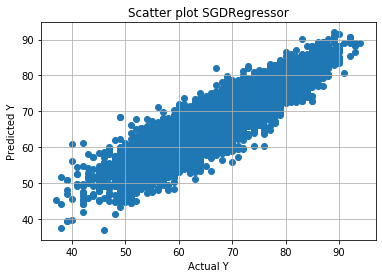

In [13]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, overall_rating, test_size=0.25, random_state=0)

reg2.fit(X_train, y_train)
pred_test = reg2.predict(X_test)
plt.scatter(y_test,pred_test)
plt.grid()
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Scatter plot SGDRegressor')
plt.show()


RMSE value for k=  1 is: 1.4371127607135425
RMSE value for k=  2 is: 1.4674191600658149
RMSE value for k=  3 is: 1.5371942246708927
RMSE value for k=  4 is: 1.5919015401176657
RMSE value for k=  5 is: 1.6410105998357583
RMSE value for k=  6 is: 1.6891998468890845
RMSE value for k=  7 is: 1.7266537186638116
RMSE value for k=  8 is: 1.7586972550592932
RMSE value for k=  9 is: 1.7860959172709656
RMSE value for k=  10 is: 1.8086762098454865


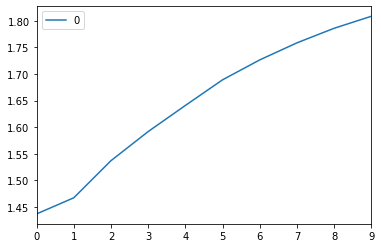

In [8]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, overall_rating, test_size=0.25, random_state=0)

rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    reg3 = KNeighborsRegressor(n_neighbors = K)
    reg3.fit(X_train, y_train)  #fit the model
    pred=reg3.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()